In [ ]:
import warnings
warnings.simplefilter('ignore')


import random
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
df = pd.read_csv(r"/content/password-strength-dataset.csv", on_bad_lines='skip')

In [ ]:
df.head(10)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
5,AVYq1lDE4MgAZfNt,2
6,u6c8vhow,1
7,v1118714,1
8,universe2908,1
9,as326159,1


In [ ]:
df.shape

(669639, 2)

In [ ]:
df.isnull().sum()

,0
password,0
strength,0


In [ ]:
df["strength"].value_counts()

,count
strength,
1,496801
0,89701
2,83137


<Axes: xlabel='strength', ylabel='count'>

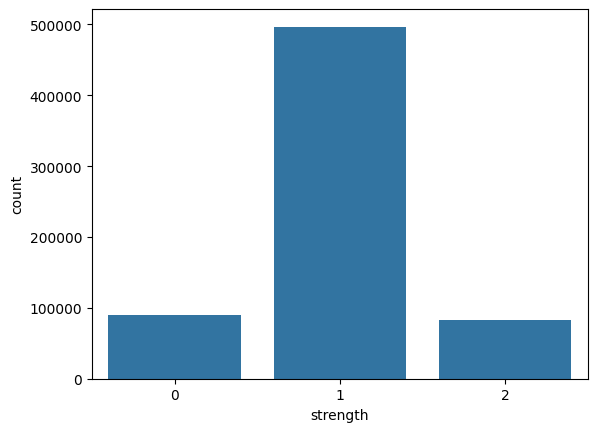

In [ ]:
sns.countplot(x = 'strength', data = df)

In [ ]:
x = df['password']
y = df['strength']

In [ ]:
def character(inputs):

    characters = []
    for i in inputs:
        characters.append(i)

    return characters

In [ ]:
vec = TfidfVectorizer(tokenizer = character)
x = vec.fit_transform(x)

In [ ]:
vec.vocabulary_

{'k': 67,
 'z': 82,
 'd': 60,
 'e': 61,
 '5': 40,
 '7': 42,
 'i': 65,
 'n': 70,
 'o': 71,
 '3': 38,
 '4': 39,
 'v': 78,
 's': 75,
 '1': 36,
 'y': 81,
 'r': 74,
 'm': 69,
 'g': 63,
 '2': 37,
 'l': 68,
 'a': 57,
 'b': 58,
 'h': 64,
 'q': 73,
 'f': 62,
 't': 76,
 'u': 77,
 '6': 41,
 'c': 59,
 '8': 43,
 'w': 79,
 '9': 44,
 '0': 35,
 'j': 66,
 'p': 72,
 '@': 50,
 '-': 32,
 'x': 80,
 '.': 33,
 '>': 48,
 '&': 26,
 '?': 49,
 '<': 46,
 '!': 21,
 ';': 45,
 '_': 55,
 '+': 30,
 '%': 25,
 '±': 100,
 '"': 22,
 '~': 86,
 '^': 54,
 '/': 34,
 '$': 24,
 ')': 28,
 ' ': 20,
 '(': 27,
 '#': 23,
 'ú': 139,
 '*': 29,
 '`': 56,
 '{': 83,
 '}': 85,
 '[': 51,
 ']': 53,
 'þ': 143,
 'ó': 133,
 'ô': 134,
 '=': 47,
 '\\': 52,
 '\x1c': 17,
 '³': 102,
 '¿': 113,
 '\x16': 12,
 'ò': 132,
 '·': 106,
 '\x1e': 19,
 '\x19': 15,
 '\x05': 3,
 '\x1b': 16,
 'å': 121,
 '‚': 148,
 'ä': 120,
 'à': 116,
 'õ': 135,
 'ß': 115,
 '´': 103,
 '«': 97,
 'ð': 130,
 'â': 118,
 ',': 31,
 '°': 99,
 '|': 84,
 '\x7f': 87,
 '²': 101,
 '¾': 112,

In [ ]:
x.shape

(669639, 154)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1000)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(669639, 154)
(535711, 154)
(133928, 154)


# Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

In [ ]:
test_acc = accuracy_score(y_test, y_pred_test)
train_acc = accuracy_score(y_train, y_pred_train)

In [ ]:
print(test_acc)
print(train_acc)

0.8182978914043366
0.8189322227842998


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

In [ ]:
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

In [ ]:
test_acc_1 = accuracy_score(y_test, y_pred_gb)
test_acc_1

0.9129681619974912

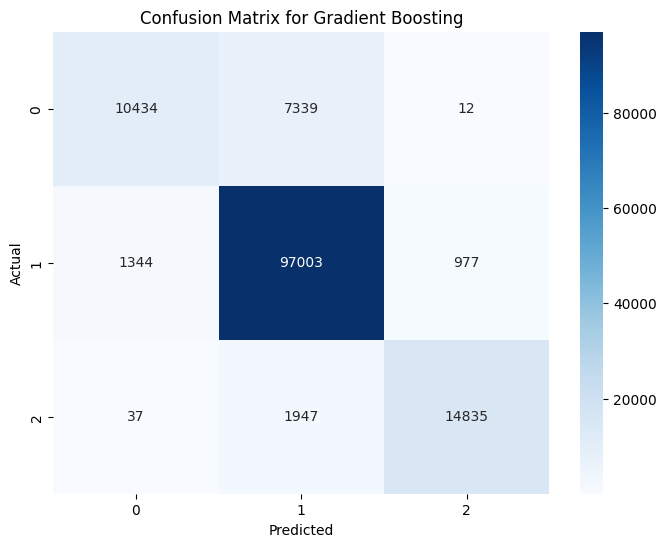

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#confusion matrix for the better model
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

# Predicting input password's strength

In [64]:
ps_word = input()
ps_word = np.array([ps_word])
ps_word = vec.transform(ps_word)

y_pred = gb_model.predict(ps_word)

print(y_pred)

shraddhaDD4478
[1]
